<a href="https://colab.research.google.com/github/clouououd/ai/blob/main/Algorithm3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Hash Search 해시 탐색 - 저장법

24인 데이터는 첨자 24에 넣어두고 36데이터는 첨자 36에 넣어두는 것이다.
단지 2개의 데이터를 보관하는데 최고한 37의 요소의 배열이 필요하다. 즉 낭비가 심하다.

해시 탐색법의 특징은 나중에 데이터를 쉽게 찾도록 보관하는 단계에서 사전 준비를 해두는 것이 특징이다.

11 15 23 26

가장 알기 쉬운 방법은 데이터를 데이터의 숫자와 같은 방에 넣어두는 것이다.
하지만 메모리의 불필요한 누수가 커진다.
따라서,

먼저 방을 7개 준비한다. index 0 ~ index 6

index  0  1  2  3  4  5
11 15 23 26

11 % 7(index의 수) = 4 # 왜 7개의 방을 준비?
15 % 7             = 1 # 나머지가 같은 경우는 어떻게 하지?
23 % 7             = 2
26 % 7             = 5

index  0  1  2  3  4  5
data      15 23    11 26

제대로 흩어진 상태가 되었다. 각각의 데이터를 나머지 값과 같은 번호의 방에 넣어둔다.

데이터를 넣은 방의 번호를 계산한 식은

    해시값 -> 방번호 = 데이터 % 7(방의갯수) <- 해시함수

# 해시 탐색법으로 데이터를 찾는 방법

11이라는 데이터를 찾아보자. 찾을때도 저장할 때 사용한 해시 함수를 다시 사용한다.
저장할때의 계산식은 '데이터값 % 7' 이고 해시값은 4이며 인텍스 번호를 나타낸다.

따라서 해시 탐색법을 사용하면 단 한번의 계산으로 찾고자 하는 공을 찾을 수 있다.
검색 시간을 놀라울 정도로 단축시킬 수 있다는 큰 장점이 있다.

# 해시 함수로 데이터를 보관하는 알고리즘
- 해시 함수는 데이터의 저장소 첨자를 계산한다.
- 저장소의 첨자가 겹치는 것을 '충돌'이라고 한다.
- 충돌이 발생하면 옆의 빈 요소에 데이터를 보관한다.

1, 배열은 2개 준비한다.

- 첫번째 배열은 데이터의 개수만큼 준비한다.(임시배열)... arrayD
  0  1  2  3  4  5  6
  12 25 36 20 30 8  42

- 두번째 배열은 11개를 준비하여 0으로 초기화한다.(실제 저장될 배열)...arrayH
  0  1  2  3  4  5  6  7  8  9  10
  0  0  0  0  0  0  0  0  0  0  0 

- arrayD 첫번째 요소부터 순차적으로 hash값을 계산하여 arrayH로 저장한다.
  지금은 요소수가 11개이므로 11로 나눈 나머지를 계산하여 저장한다.

  '해시값' = 'arrayD의 data' % 11 ...해시함수

- 첫번째 arrayD[0] = 12 를 해시함수에 넣어 계산하면 해시값은 1이 된다.
  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  0  0  0  0  0  0  0  0 

- 이미 다른 데이터가 할당 되어 있는지 확인하여 비어있으면 대입한다.
  왜 확인이 필요하느냐는 다음에 자세히 나오지만 요소가 많으면
  해시 값이 즉, 나머지 값이 우연히 일치하는 경우가 많아 이미 데이터가 저장되어 있을 가능성이 높다.

- 요소가 비어 있는지 확인 하려면 0이 있는지 확인하면 된다.

In [ ]:
  0  1  2  3  4  5  6
  12 25 36 20 30 8  42

  0  1  2  3  4  5  6  7  8  9  10
  0  12  0  0  0  0  0  0  0  0  0
  
  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  25  0  0  0  0  0  0  0

- arrayD[2]의 데이터 36의 해시값은 3이다. 이미 데이터 25가 존재한다.

  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  25  0  0  0  0  0  0  0
           --
           이미 25가 들어가 있어서 넣을 수 없다
- 해시 탐색법에서는 이러한 해시값이 이미 존재하는 것을 '충돌(synonym)'이라고 한다.
  이러한 충돌이 발생하는 경우 죽, arrayH[k] = 0 이 아닌 No인 경우 처리를 생각해야한다.
  해결책은 간단하다. 바로 옆의 요소가 비어있으면 거기에 넣으면 된다.
  arrayH[k]옆의 요소는 arrayH[k+1]이다. k값을 하나 증가시켜 0인지의 여부를 확인한다.

  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  25 36 0  0  0  0  0  0 

- 충돌에 대하여 ***
  충돌이 너무 자주 일어나면 추가적인 처리가 많이 필요하게 된다.
  해시탐색법의 장법이 무색해진다.
  충돌이 일어나지 않게 하려면 데이터가 많이 흩어지도록 해야한다.
  요소가 많아 질수록 충돌의 가능성은 적어지지만, 메모리의 사용량이 늘어나 알고리즘의 효율성이 떨어지게 된다.
  연구결과 탐색 처리의 속도를 유지하는 것과 가능한 메모리를 적게 사용하는 요소의 수는
  일반적으로 '저장 데이터의 수'의 1.5배애서 2배라고 알려져 있다.

  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  25 36 0  0  0  30 20 0
                          --
                          8을 넣을때 충돌 발생
  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  25 36 0  0  0  30 20 0
                             --
                             옆방에 넣을려고 하면 다시 충돌 발생
  0  1  2  3  4  5  6  7  8  9  10
  0  12 0  25 36 0  0  0  30 20 8

- 마지막 요소인 42는 해시값이 9다. array[H]에 이미 데이터가 존재하고
  arrayH[10]에도 이미 데이터가 존재한다. 그리고 그 이상의 값은 없다.  
  해결방법으로 k를 하나 증가시키는 처리 k + 1 -> k 의 k + 1을 arrayH의 요소수로 나누어
  그 나머지를 k에 대입하는 방법이다.
  즉, (k+1) % 11 -> k
- k 값이 0에서 10인 경우에는 11로 나눌 필요가 없지만 k 값이 10을 초과하는 경우의 처리를
  별도로 준비하는것은 비효율 적이다.
  두 경우 모두 11로 나누는처리를 거친 값을 대입한다.
  k값이 0에서 10인 경우에는 이 과정을 거친 후체도 원래값과 같아서 문제가 없다.
  k가 10을 넘어 11이 된다면 나머지가 0이되어서 (11 % 11 = 0)맨 앞 요소에 다시 할당할 수 있는 장소를 찾게 된다.
  만약, arrayH[0]에도 이미 데이터가 있다면 k 12 12 % 11 = 1이되어 바로 옆칸을 확인하는 처리를 진행하게 된다.
  언젠가는 빈칸을 발견하게 된다.

  0  1  2  3  4  5  6  7  8  9  10
  42  12 0  25 36 0  0  0  30 20 8

- 마지막 데이터 42를 ...

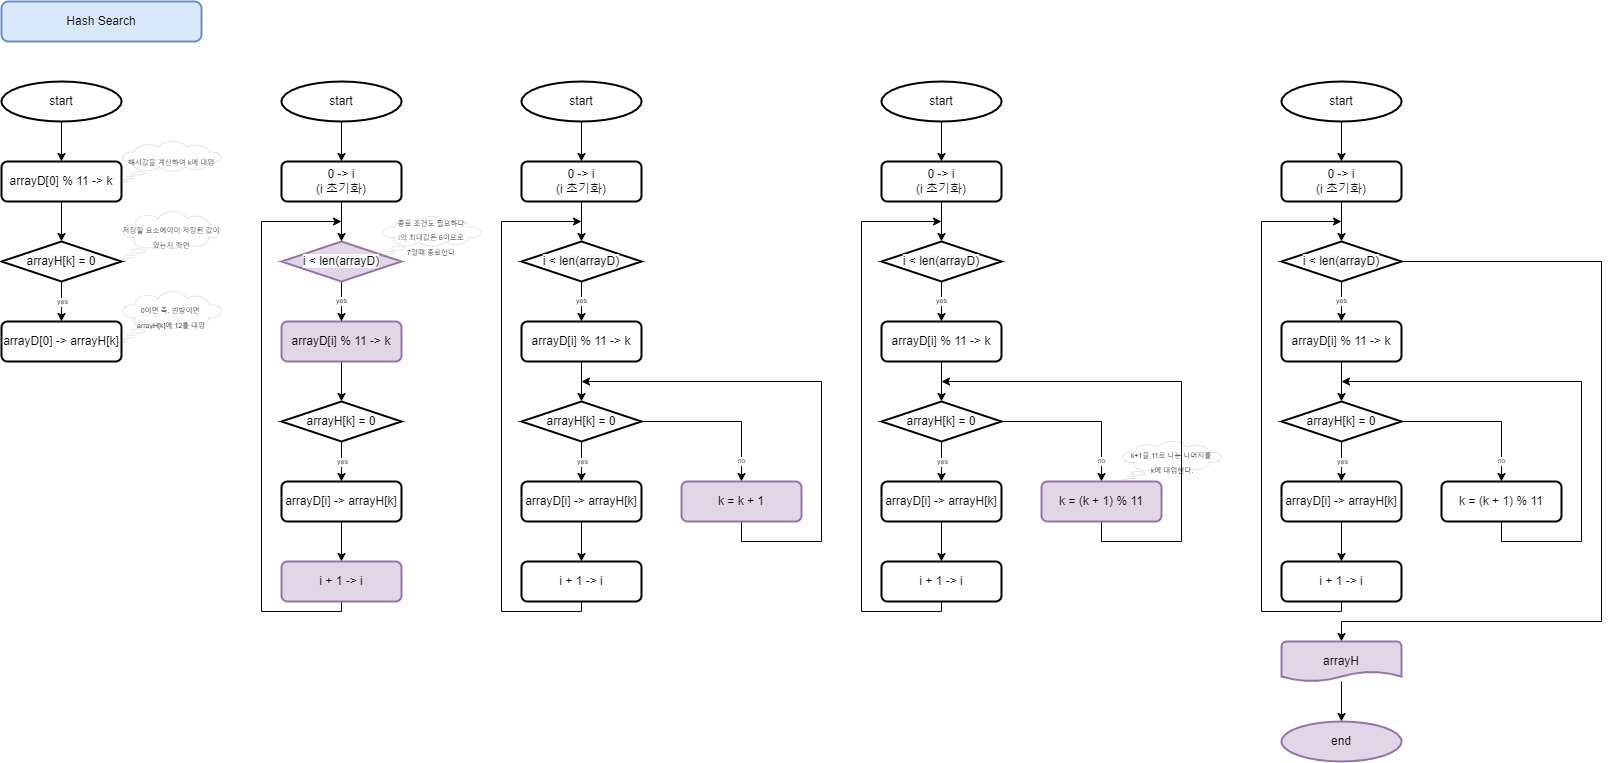

In [ ]:
# Hash Search 해시 탐색 - 검색법

  0  1  2  3  4  5  6  7  8  9  10
  42  12 0 25 36 0  0  0  30 20 8

- 찾을때도 저장할 때 사용한 것과 같은 해시함수를 사용하여 위치를 산출한다.

    해시값 = 데이터값 % 11
                12    % 11 = 1 arrayH[1]

In [ ]:
# 저장할 때 충돌이 일어났던 36을 검색해보자
# x에 36을 입력하면 해시값은 3을 얻게된다.
# arrayH[3] 이미 25라는 다른 데이터가 존재하고 있다.

  0  1  2  3  4  5  6  7  8  9  10
  42  12 0 25 36 0  0  0  30 20 8
            --
- 이것은 찾고 있는 데이터 36이 아니다. 이럴 경우 저장 했을 때와  마찬가지로 k를 하나 증가시켜 옆자리를 찾게된다.
  저장할때 사용한 k가 10을 넘어도 문제가 생기지 않도로고 미리 (k+1)

# 검색 하고 있는 데이터가 존재하지 않을 경우

# 현재는 찾고 있는 데이터가 존재하지 않는 경우 무한 루프가 발생한다.

- 탐색 데이터가 발견되지 않으면 k값을 점점 증가하다가 다시 처음부터 검색하고 이과정을 계속 반복한다.
  그러면 과연 어디까지 찾아야 존재하지 않는다고 말할 수 있을까?
  바로 데이터가 보관되지 않은 요소(값이 0인 요소)가 나왔을 때 까지이다.

  만약 데이터가 존재한다면 설사 저장할 때 충돌이 발생하여
  어딘가 다른 요소에 저장되어 있다 하더라고 저장위치를 찾을 때 까지의 사이에
  데이터가 0인 요소는 절대 있을 수 없다.

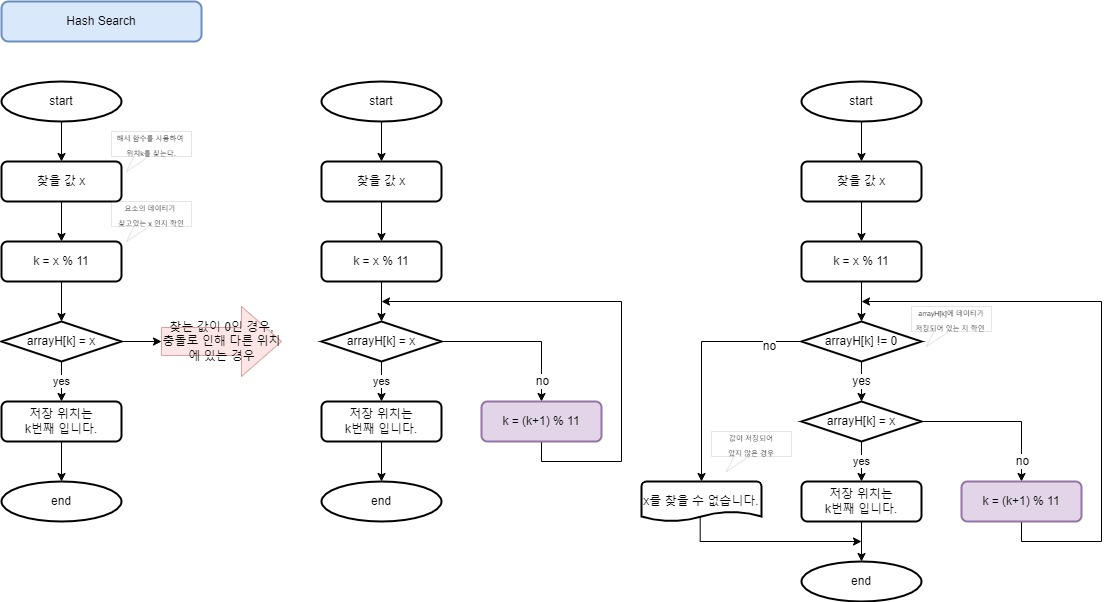